In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [15]:
file_path = 'C:\\Users\\46793\\Desktop\\Titanic_EDA\\Titanic.csv'

# Try reading the CSV with encoding specified
df_titanic = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the DataFrame
print(df_titanic.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  ... Embarked WikiId  \
0      0         A/5 21171   7.2500  ...        S  691.0   
1      0          PC 17599  71.2833  ...        C   90.0   
2      0  STON/O2. 3101282   7.9250  ...        S  865.0   
3      0            113803  53.1000  ...        S  127.0   
4      0            

In [16]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [17]:
df_titanic.shape

(1309, 21)

In [18]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


In [19]:
df_titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked,Name_wiki,Hometown,Boarded,Destination,Lifeboat,Body
count,1309,1309,1309,295,1307,1304,1304,1304,1304,502,130
unique,1307,2,929,186,3,1303,566,4,291,24,130
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,"Kelly, Mr. James","New York, New York, US",Southampton,New York City,13,175MB
freq,2,843,11,6,914,2,70,916,234,42,1


In [20]:
df_titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [21]:
survived = df_titanic[df_titanic['Survived'] == 1]
did_not_survived = df_titanic[df_titanic['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(df_titanic)*100.0))
print ("Did not Survived: %i (%.1f%%)"%(len(did_not_survived), float(len(did_not_survived))/len(df_titanic)*100.0))
print ("Total passengers: %i"%len(df_titanic))

Survived: 342 (26.1%)
Did not Survived: 549 (41.9%)
Total passengers: 1309


In [22]:
df_titanic.groupby('Pclass').Survived.value_counts().sort_values(ascending=False)

Pclass  Survived
3       0.0         372
1       1.0         136
3       1.0         119
2       0.0          97
        1.0          87
1       0.0          80
Name: count, dtype: int64

In [23]:
df_titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


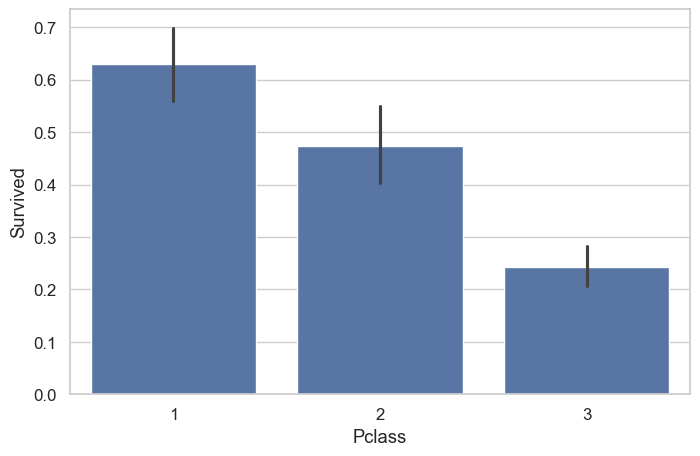

In [24]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

#df_titanic.groupby('Pclass').Survived.mean().plot(kind='bar')
sns.barplot(x='Pclass', y='Survived', data=df_titanic);

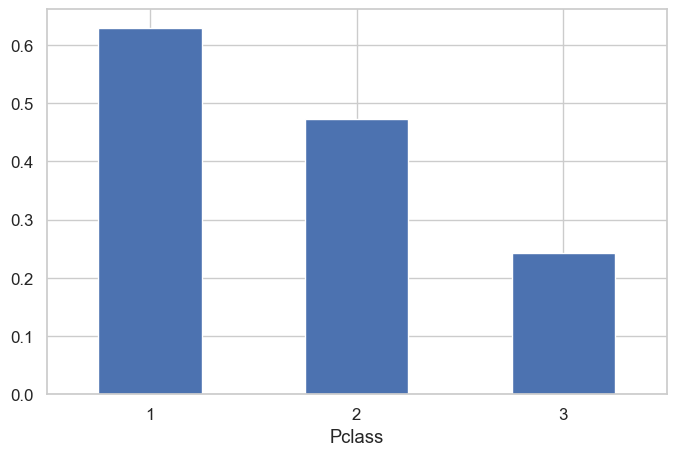

In [25]:
df_titanic.groupby('Pclass').Survived.mean().plot(kind='bar', rot=0);

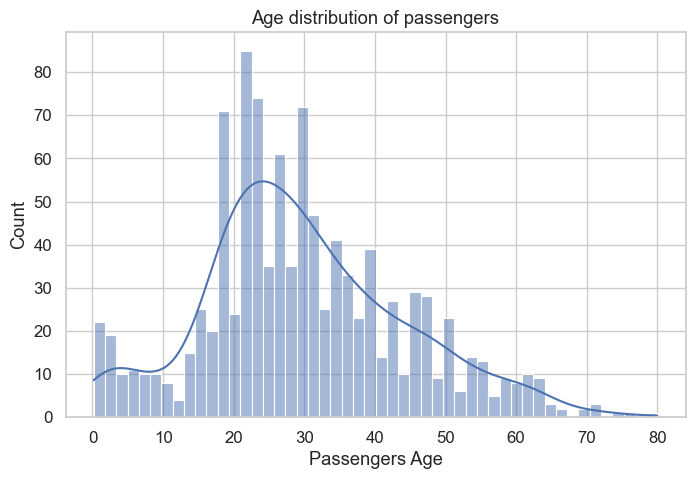

In [26]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.histplot(
    df_titanic['Age'],   kde=True, bins=50
).set(xlabel='Passengers Age', ylabel='Count', title='Age distribution of passengers');

In [27]:
df_titanic.Sex.value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

In [28]:
df_titanic.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64

In [29]:
df_titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


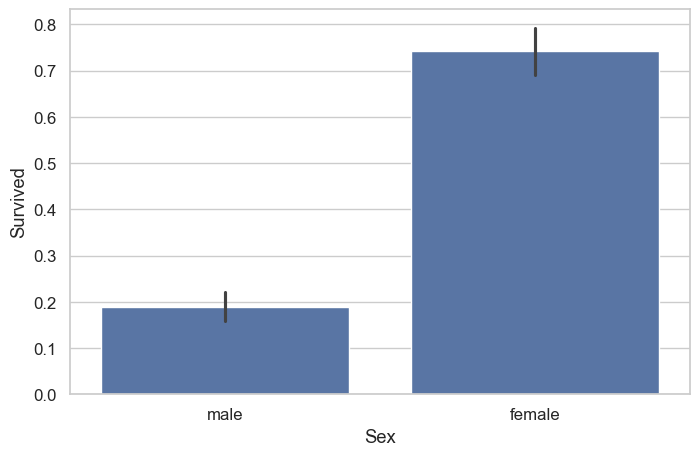

In [30]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

#df_titanic.groupby('Sex').Survived.mean().plot(kind='bar')
sns.barplot(x='Sex', y='Survived', data=df_titanic);

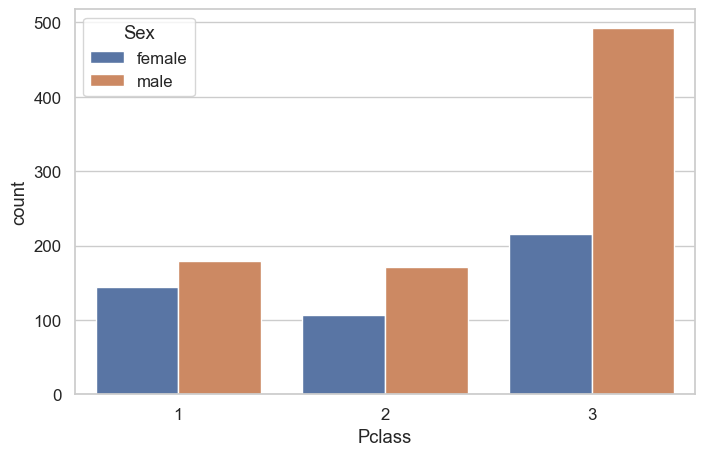

In [31]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.countplot(x ="Pclass", hue ="Sex", data =df_titanic);

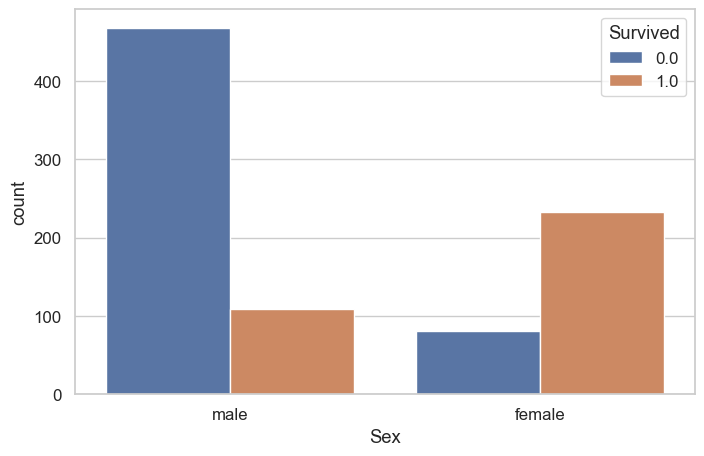

In [32]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.countplot(x ="Sex", hue ="Survived", data =df_titanic);


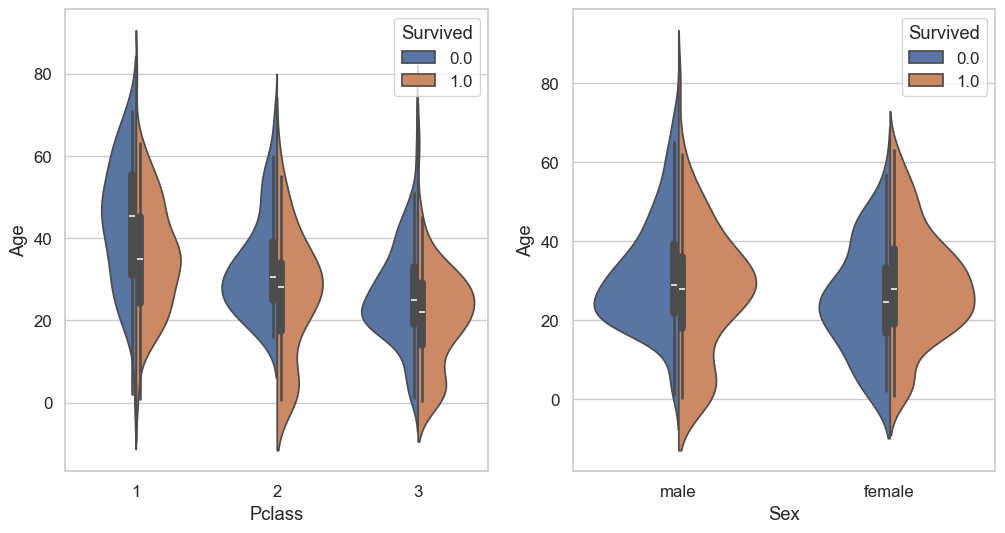

In [33]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df_titanic, split=True, ax=ax1)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_titanic, split=True, ax=ax2);

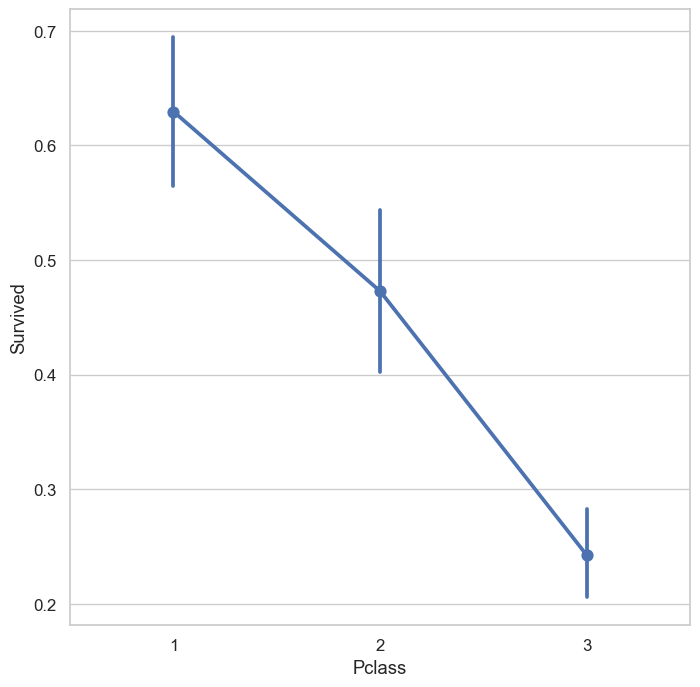

In [34]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 8]})

sns.pointplot(x='Pclass', y='Survived', data=df_titanic);

<Axes: >

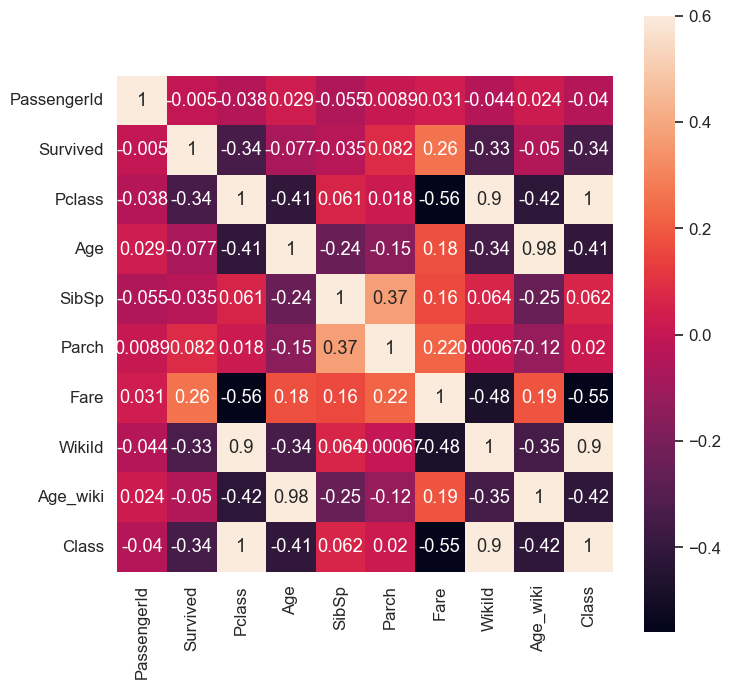

In [36]:
numeric_cols = df_titanic.select_dtypes(include=['number']).columns  # Select numeric columns
corr_matrix = df_titanic[numeric_cols].corr()  # Calculate correlation on numeric columns

# Plot the heatmap
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 8]})
sns.heatmap(corr_matrix, vmax=0.6, square=True, annot=True)

<Axes: >

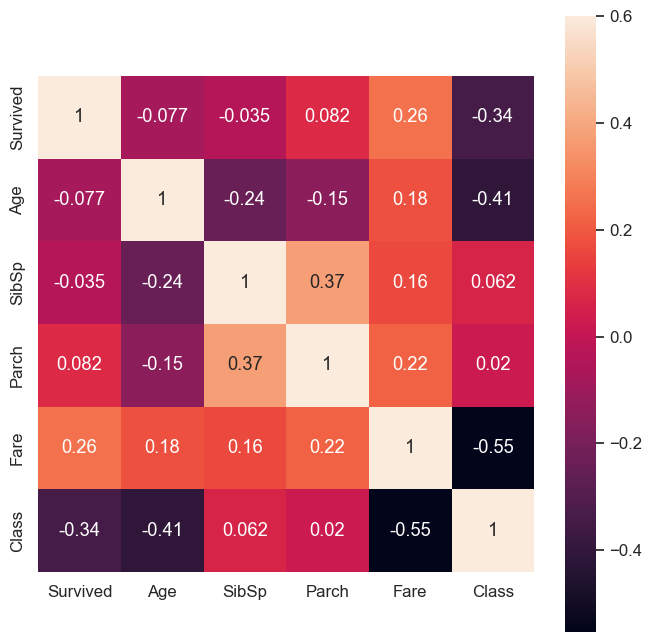

In [37]:
df_titanic_dropped = df_titanic.drop(['PassengerId', 'WikiId', 'Age_wiki', 'Pclass'], axis=1)

numeric_cols = df_titanic_dropped.select_dtypes(include=['number']).columns

corr_matrix = df_titanic_dropped[numeric_cols].corr()

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 8]})
sns.heatmap(corr_matrix, vmax=0.6, square=True, annot=True)

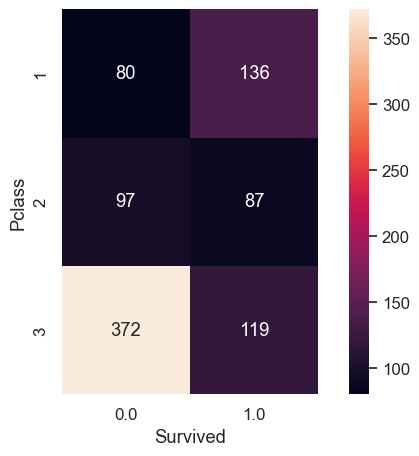

In [38]:

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

group = df_titanic.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

sns.heatmap(pclass_survived, annot = True, square=True, fmt ="d");

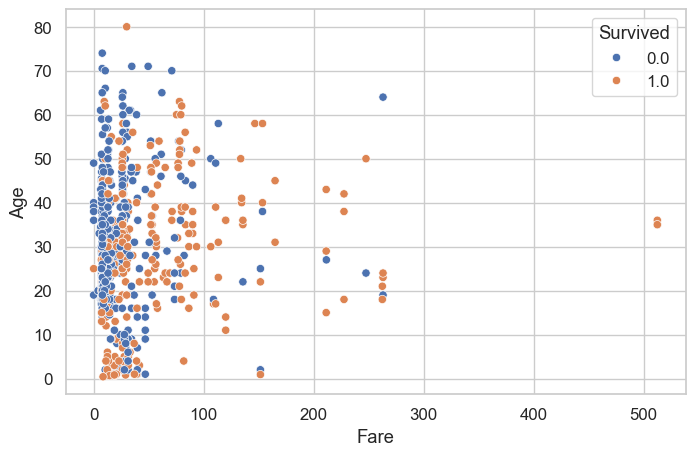

In [39]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.scatterplot(x="Fare", y="Age", hue="Survived", data=df_titanic);

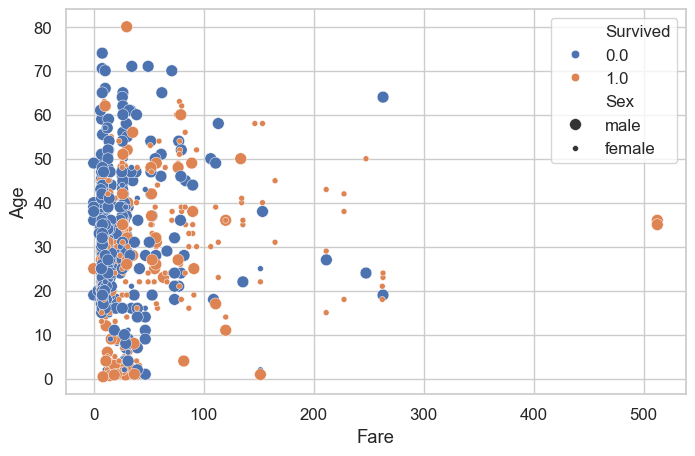

In [40]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.scatterplot(x="Fare", y="Age", hue="Survived", size="Sex", data=df_titanic);

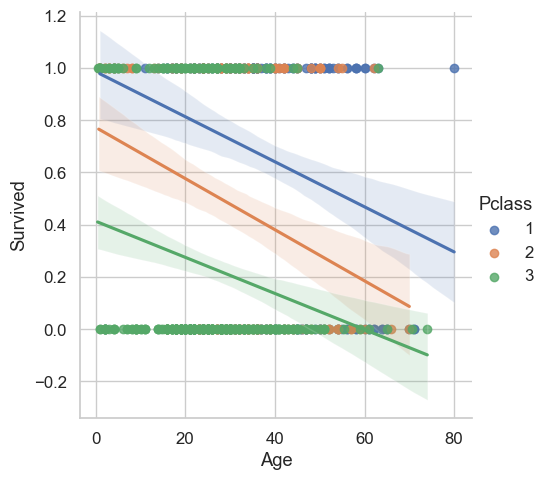

In [41]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.lmplot(x='Age', y='Survived', hue='Pclass', data=df_titanic);

In [42]:
df_titanic['Person'] = df_titanic.Sex
df_titanic.loc[df_titanic['Age'] < 16, 'Person'] = 'Child'
# Checking the distribution
print(f"Person categories : {df_titanic.Person.unique()}\n=================================")
print(f"Distribution of person : {df_titanic.Person.value_counts()}\n=================================")
print(f"Mean age : {df_titanic.Age.mean()}\n=================================")

Person categories : ['male' 'female' 'Child']
Distribution of person : Person
male      784
female    410
Child     115
Name: count, dtype: int64
Mean age : 29.881137667304014


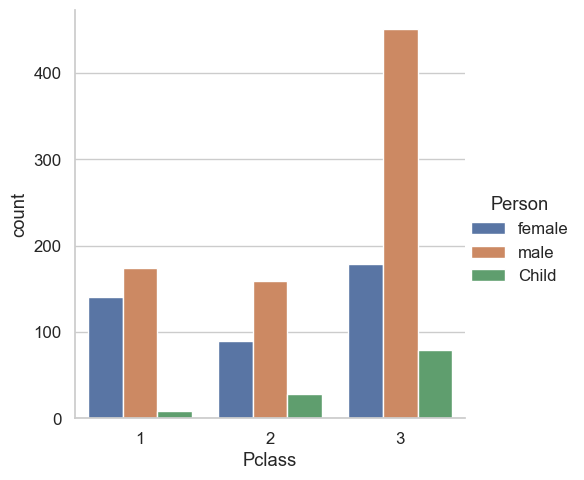

In [43]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.catplot(x='Pclass', data=df_titanic, hue='Person', kind='count');

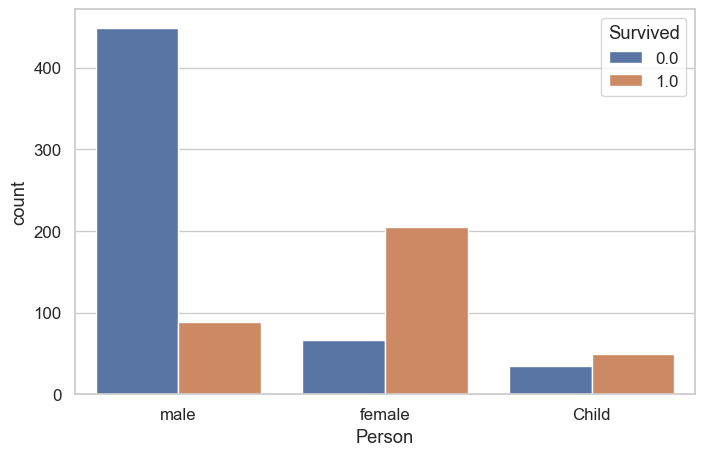

In [44]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.countplot(x ="Person", hue ="Survived", data =df_titanic);

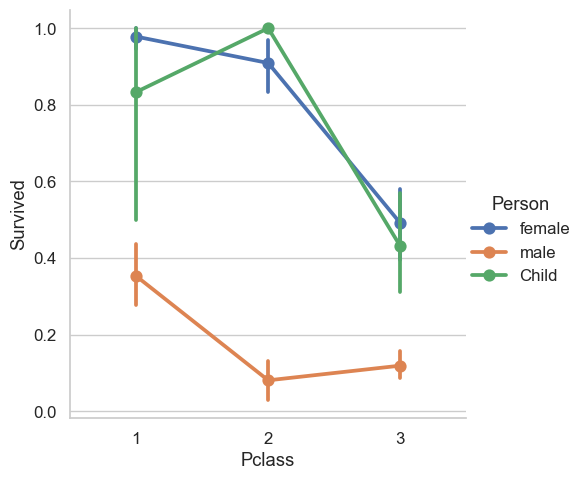

In [45]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 8]})

sns.catplot(x='Pclass', y='Survived', data=df_titanic, hue='Person', kind='point');

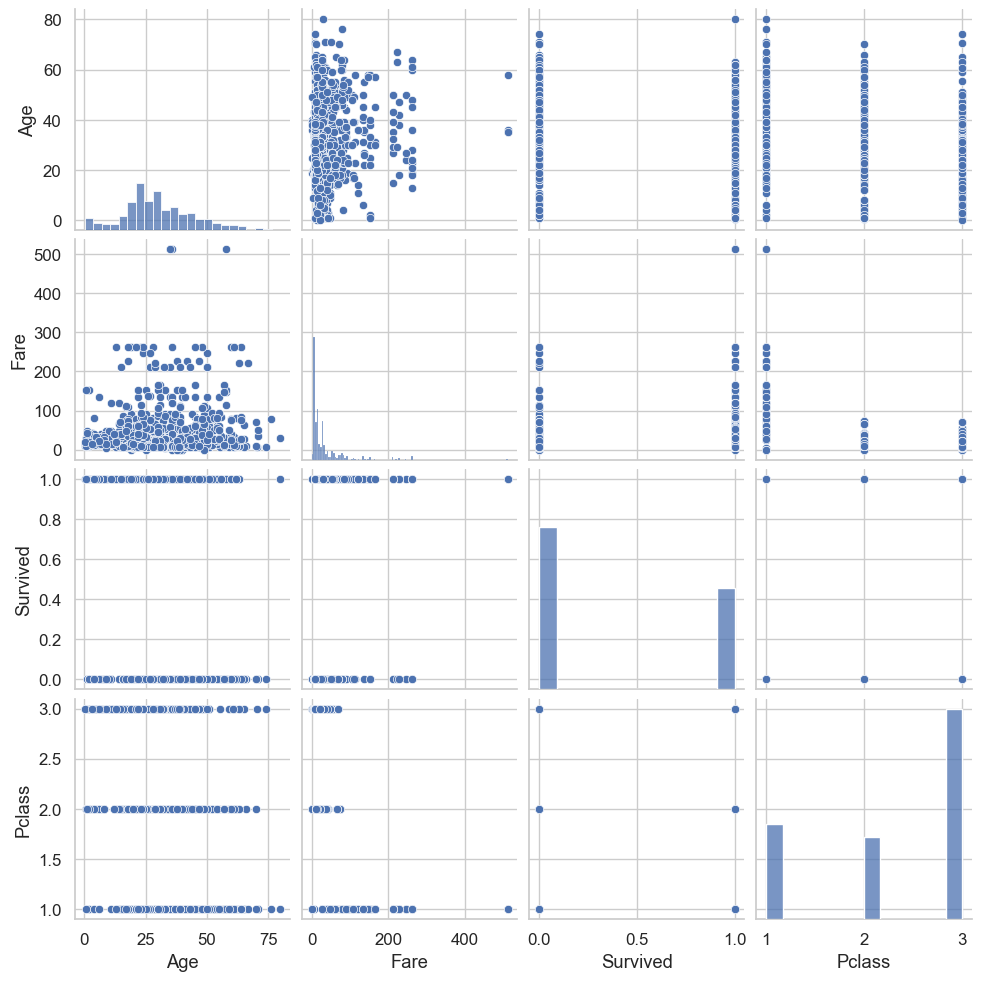

In [46]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

to_plot = ['Age', 'Fare', 'Survived', 'Pclass']

df_to_plot = df_titanic.loc[:,to_plot]
sns.pairplot(df_to_plot);